# 0. Importar Bibliotecas

Pandas - leitura e manipulação de dados  
Matplotlib - criação de frames para plotar gráficos  
Seaborn - criação de gráficos para auxiliar na interpretação  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Análise Exploratória dos Dados (EDA)

df.head() nos auxiliar a entender melhor os dados  
visualizar quais colunas estão dentro do dataset  
e quais delas podem ser úteis para a análise  

In [2]:
df = pd.read_csv('datasets/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Entendendo as colunas da tabela:  

PassengerId -   ID único para cada passageiro  
Survived    -   0: sobreviveu // 1: não sobreviveu  
Pclass      -   1: 1ª classe // 2: 2ª classe // 3: 3ª classe  
Name        -   Nome do passageiro  
Sex         -   male: masculino // female: feminino  
Age         -   idade do passageiro  
SibSp       -   quantidade de irmãos/irmãs (de sangue ou não) e esposo/esposa  
Parch       -   quantidade de filhos/filhas (de sangue ou não) e mãe/pai  
Ticket      -   ticket do passageiro  
Cabin       -   cabine do passageiro  
Embarked    -   local de embarque C: Cherbourg // Q: Queenstown // S: Southampton  

Nessa análise não vamos precisar dos dados dos passageiros  
Como será uma análise quantitativa, podemos deletar as colunas qualitativas  
Esse processo melhora o desempenho do código como um todo  

In [3]:
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']

As colunas 'Age' e 'Fare' possuem diversos números  
Sendo assim, fica mais fácil visualizar em gráficos se colocarmos como um intervalo  

In [4]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']
df['Age_range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

fare_bins = [0, 50, 100, 150, 200, 250, 300, 1000]
fare_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300+']
df['Fare_range'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range,Fare_range
0,0,3,male,22.0,1,0,7.2500,S,20-29,0-49
1,1,1,female,38.0,1,0,71.2833,C,30-39,50-99
2,1,3,female,26.0,0,0,7.9250,S,20-29,0-49
3,1,1,female,35.0,1,0,53.1000,S,30-39,50-99
4,0,3,male,35.0,0,0,8.0500,S,30-39,0-49


Vamos agora usar o df.info() para verificar se as colunas estão formatadas corretamente  
Esse passo é importante para criar os gráficos da maneira correta  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         714 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    889 non-null    object  
 8   Age_range   714 non-null    category
 9   Fare_range  891 non-null    category
dtypes: category(2), float64(2), int64(4), object(2)
memory usage: 58.3+ KB


Já a função .describe() nos dá uma noção quantitativa, como estão distribuídos os dados  

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Também podemos usar .corr() para identificar a correlação entre as variáveis numéricas  

In [7]:
corr_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

corr_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Essa tabela fornece algumas correlações fracas, nada que aponte para uma direção certeira  

Já a função .pairplot() da biblioteca sns fornece uma visão gráfica das variáveis  
Mas novamente, não deixa uma correlação clara com a taxa de sobrevivência  

c:\Users\Marco Aurelio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


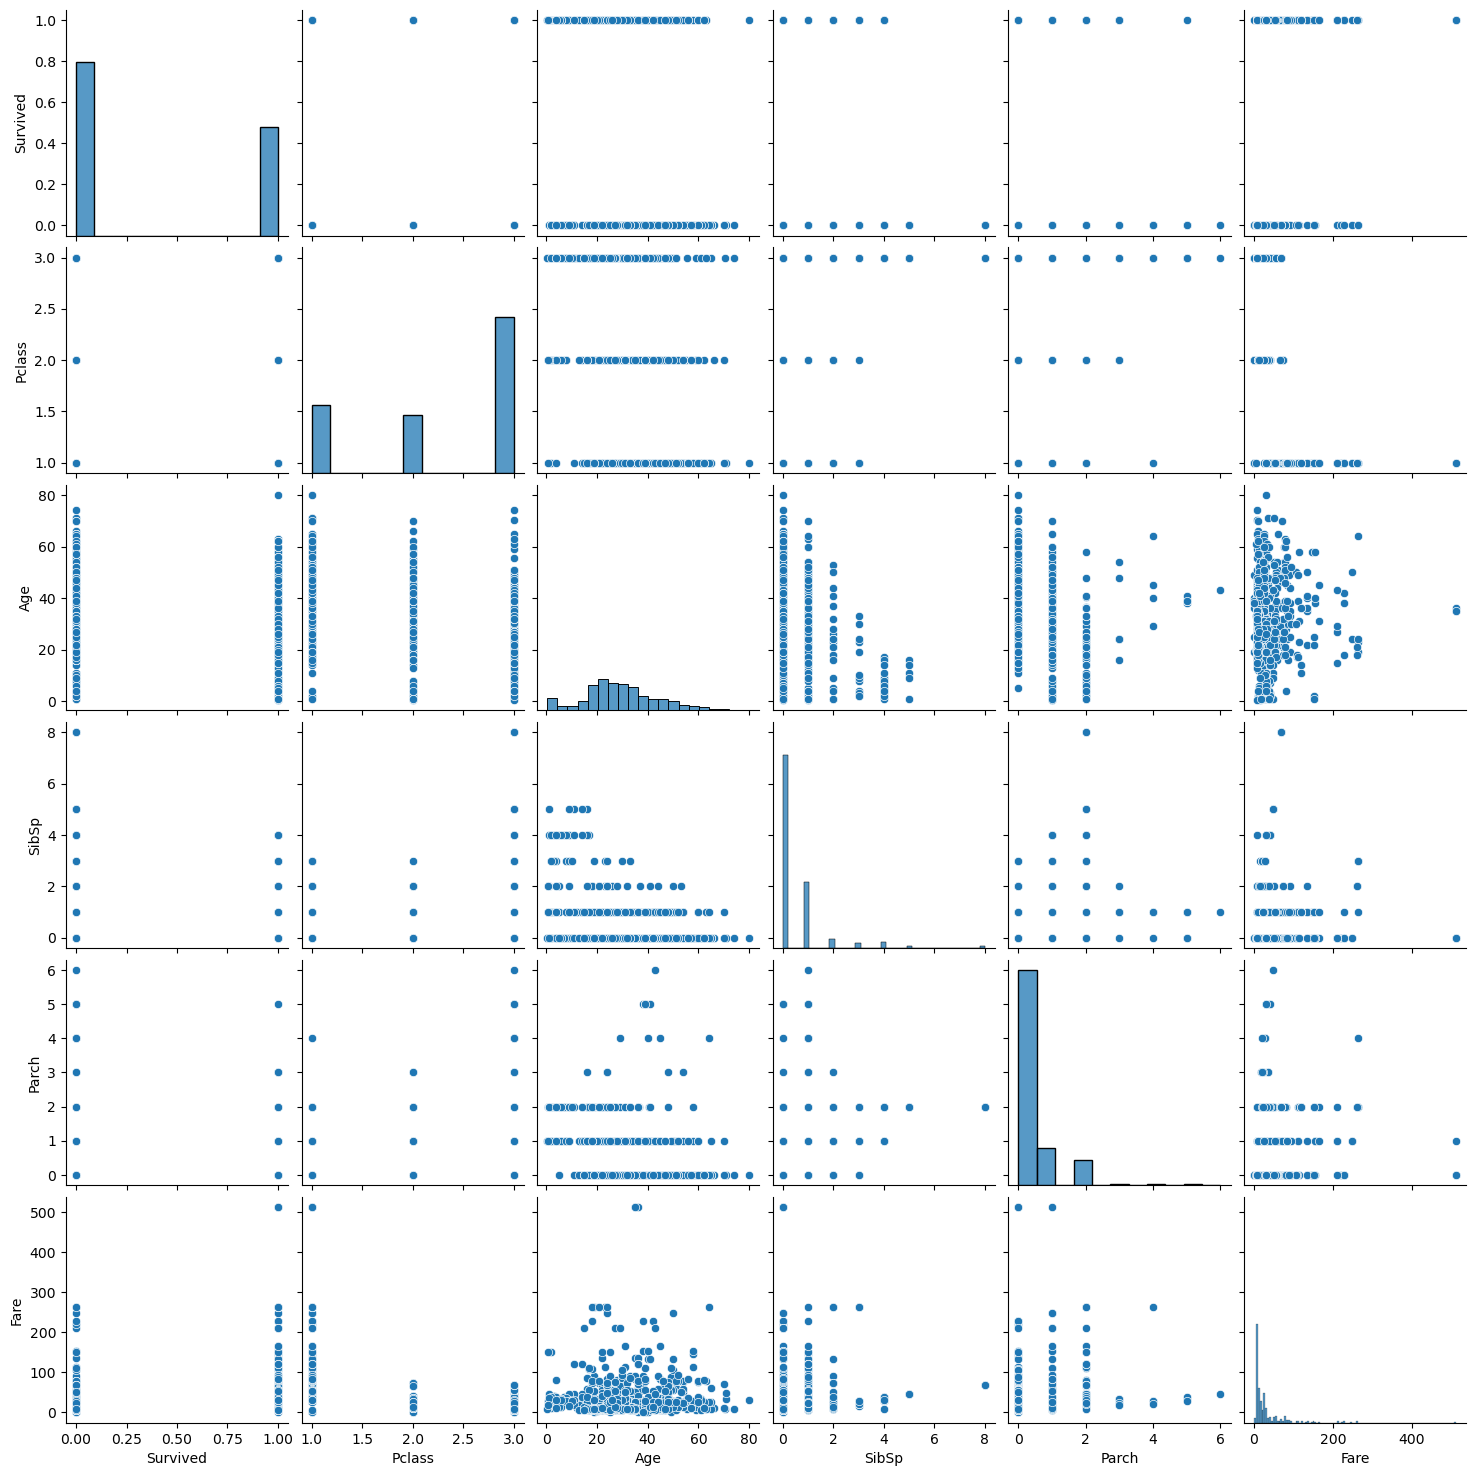

In [8]:
sns.pairplot(df)

Vamos analisar a relação entre os parâmetros com os sobreviventes  
Isso pode nos dar uma noção prévia do que podemos analisar

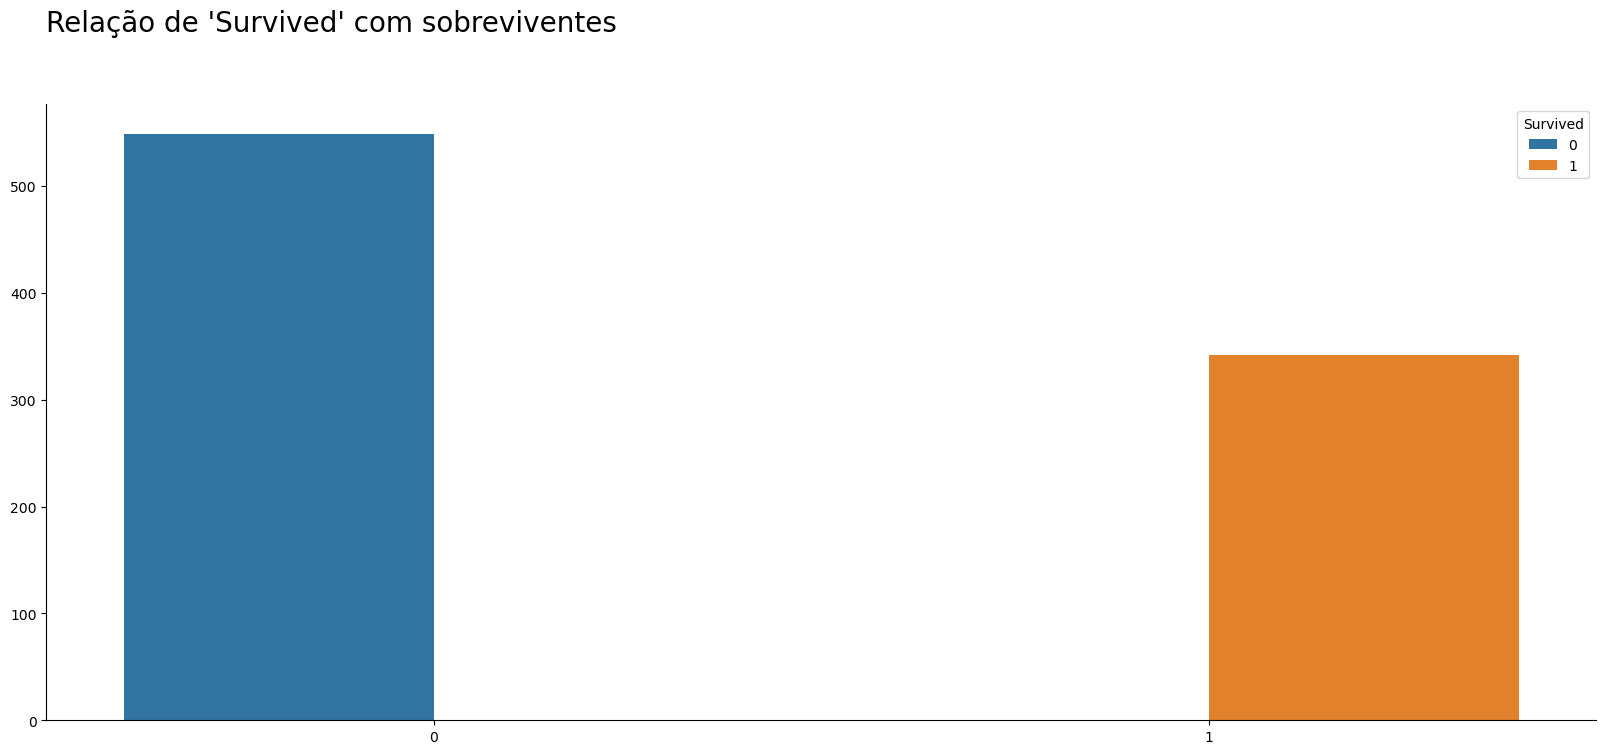

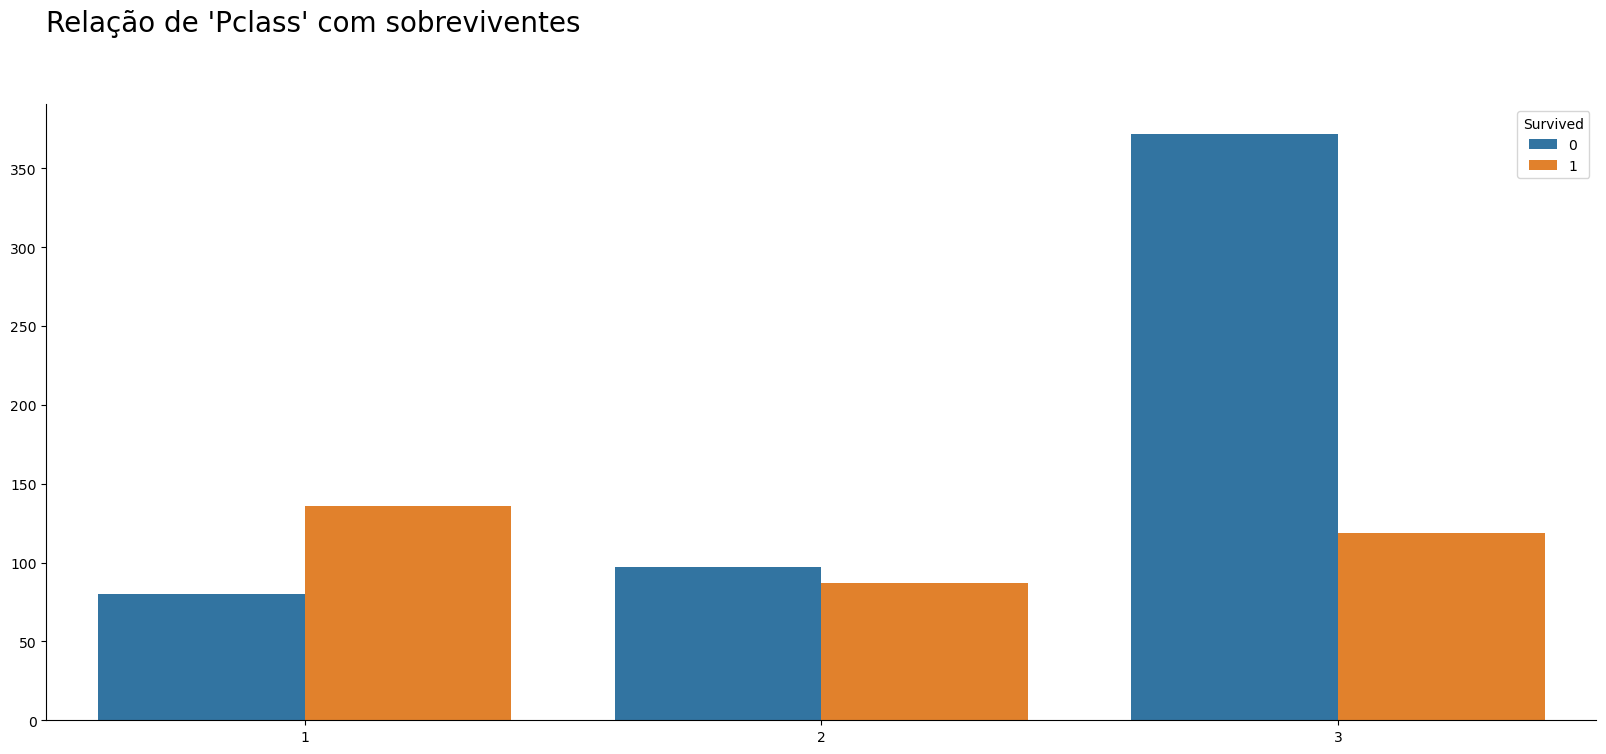

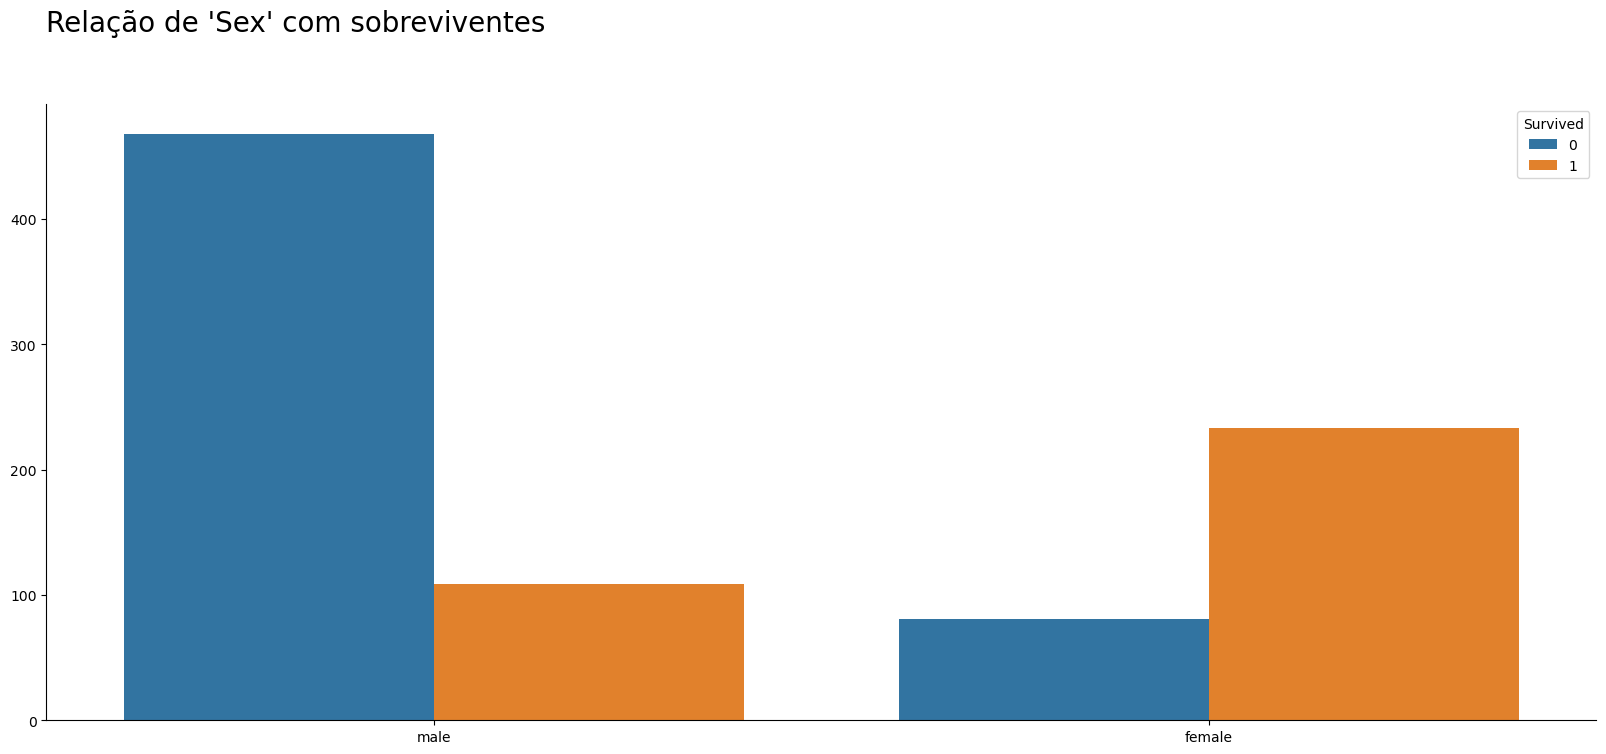

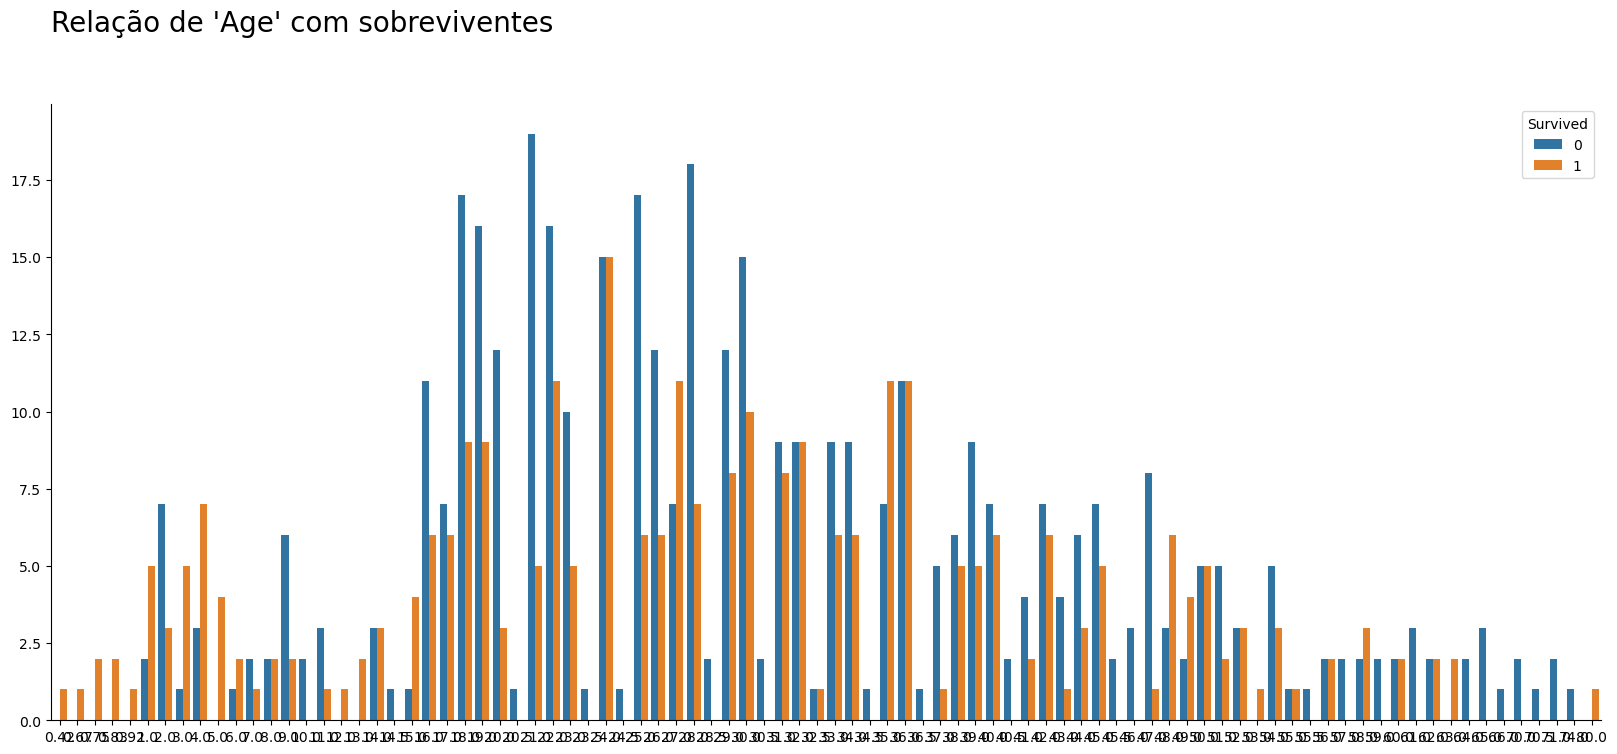

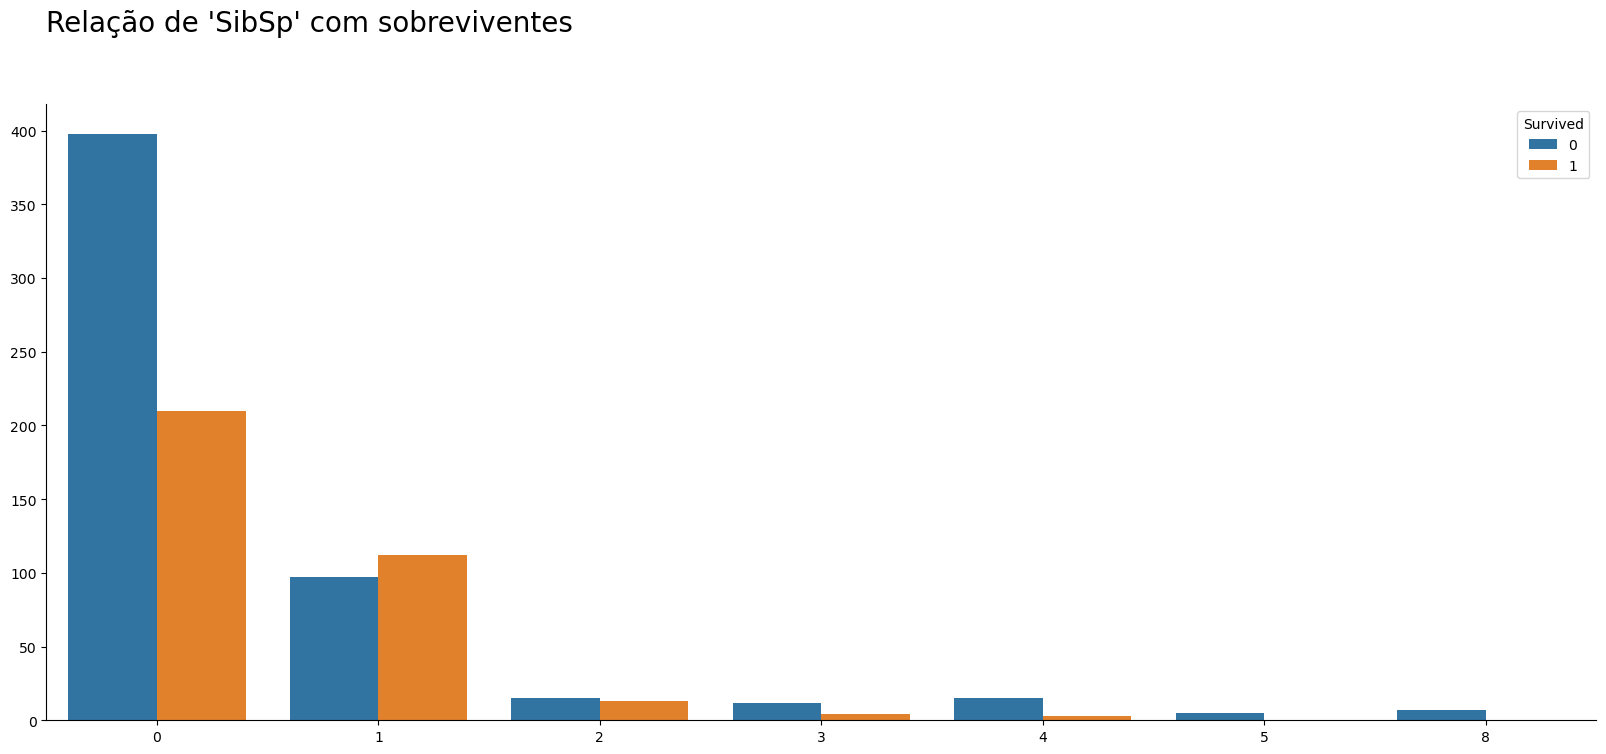

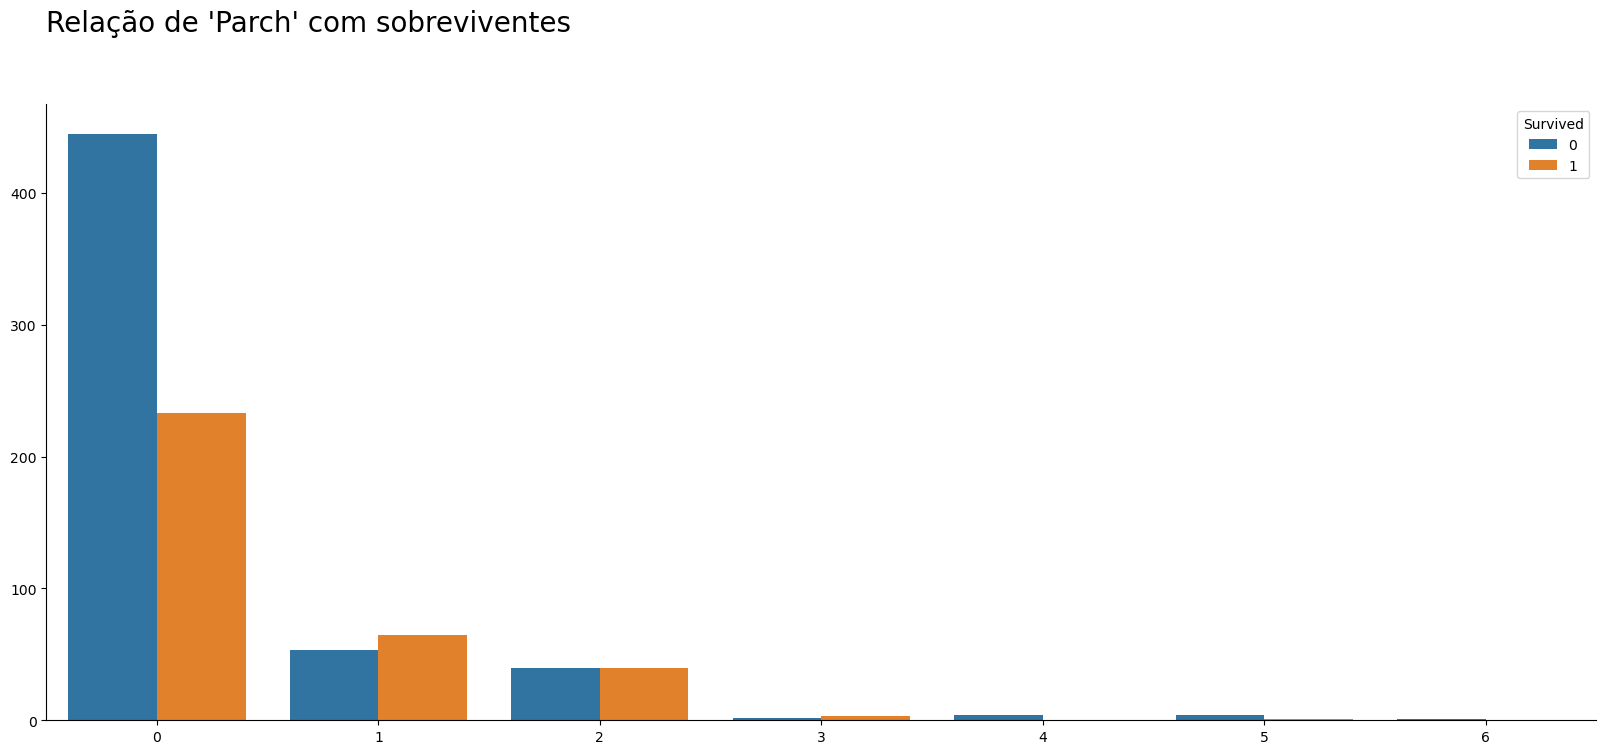

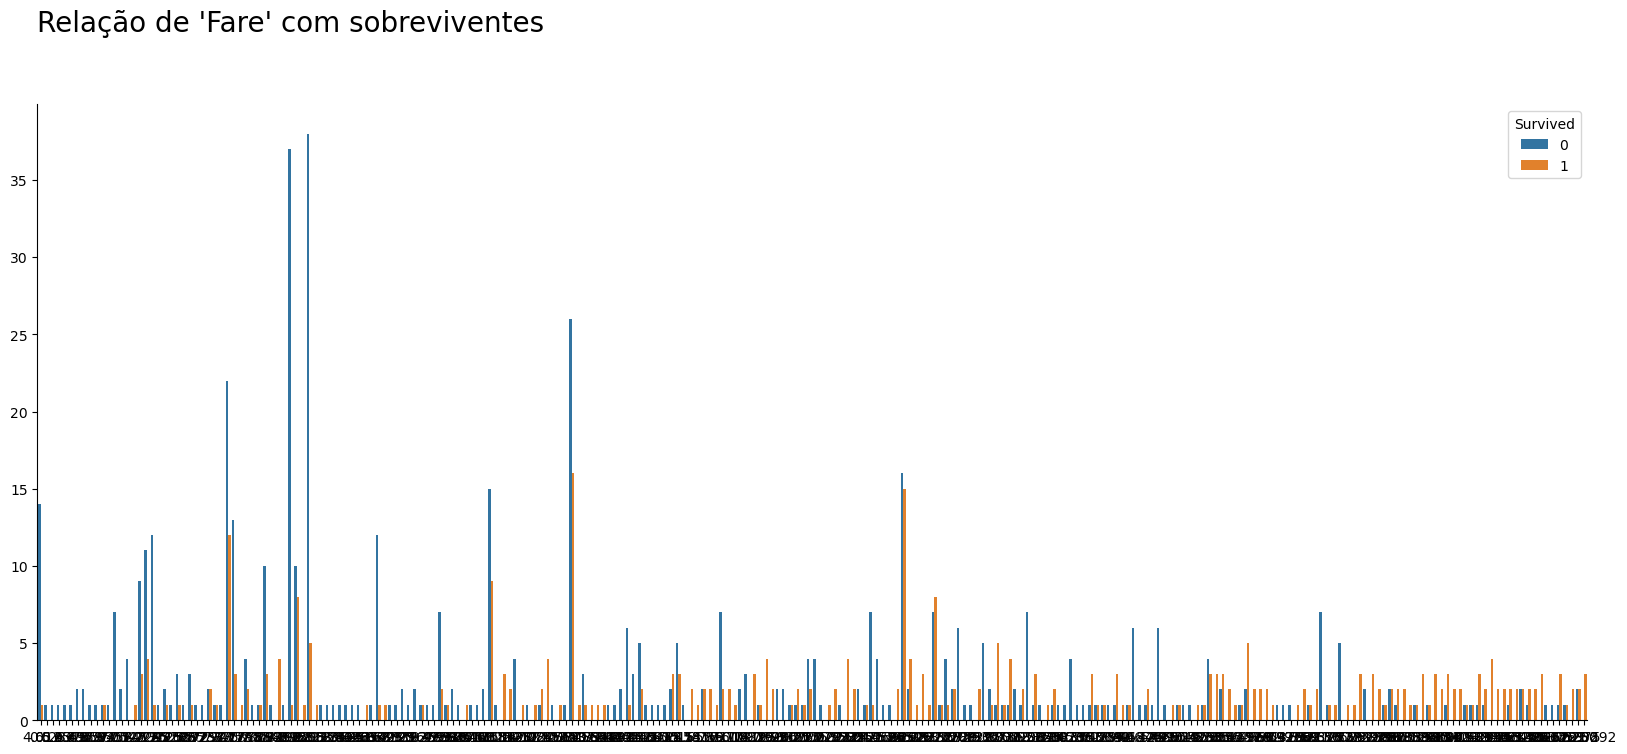

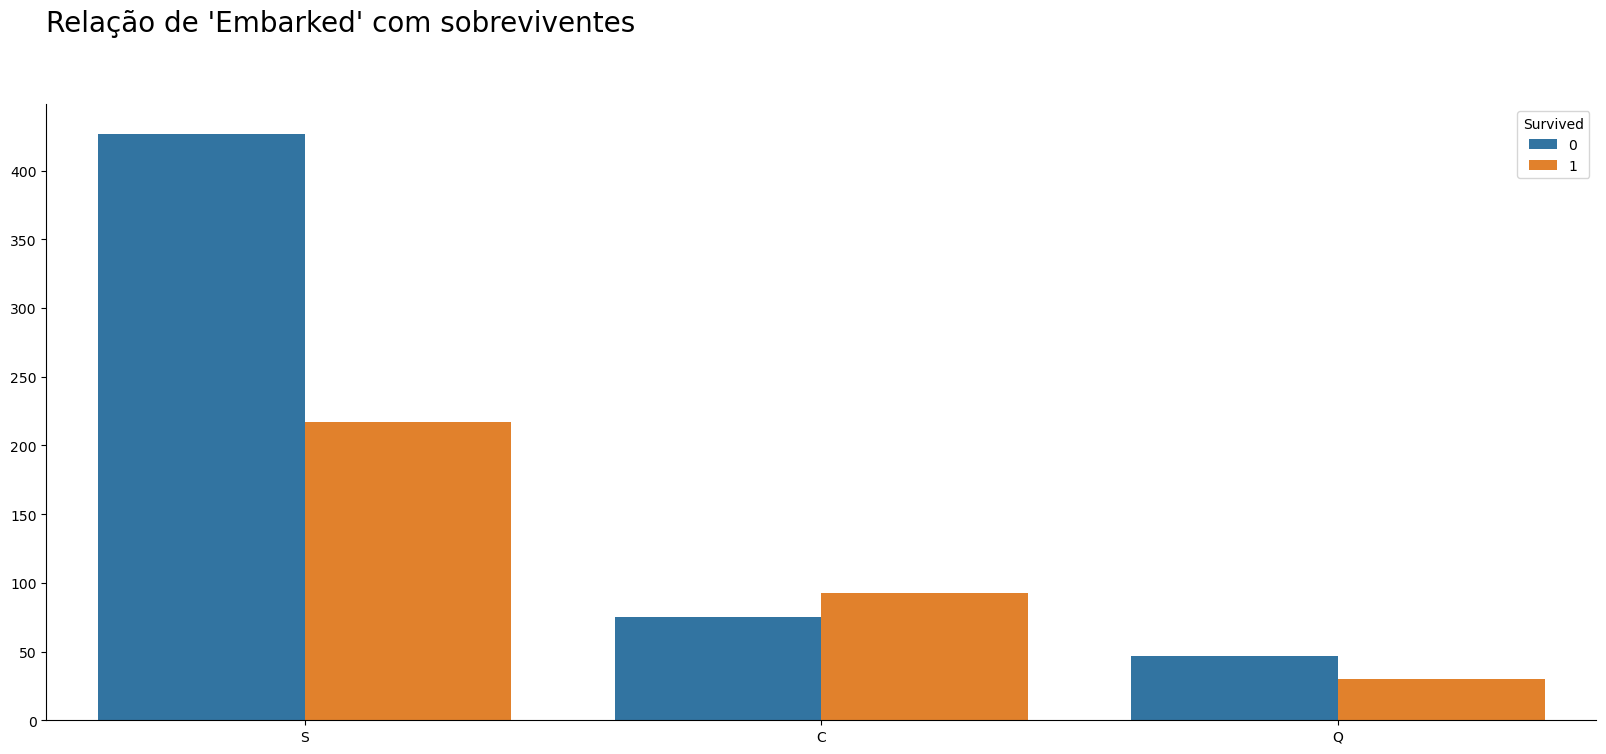

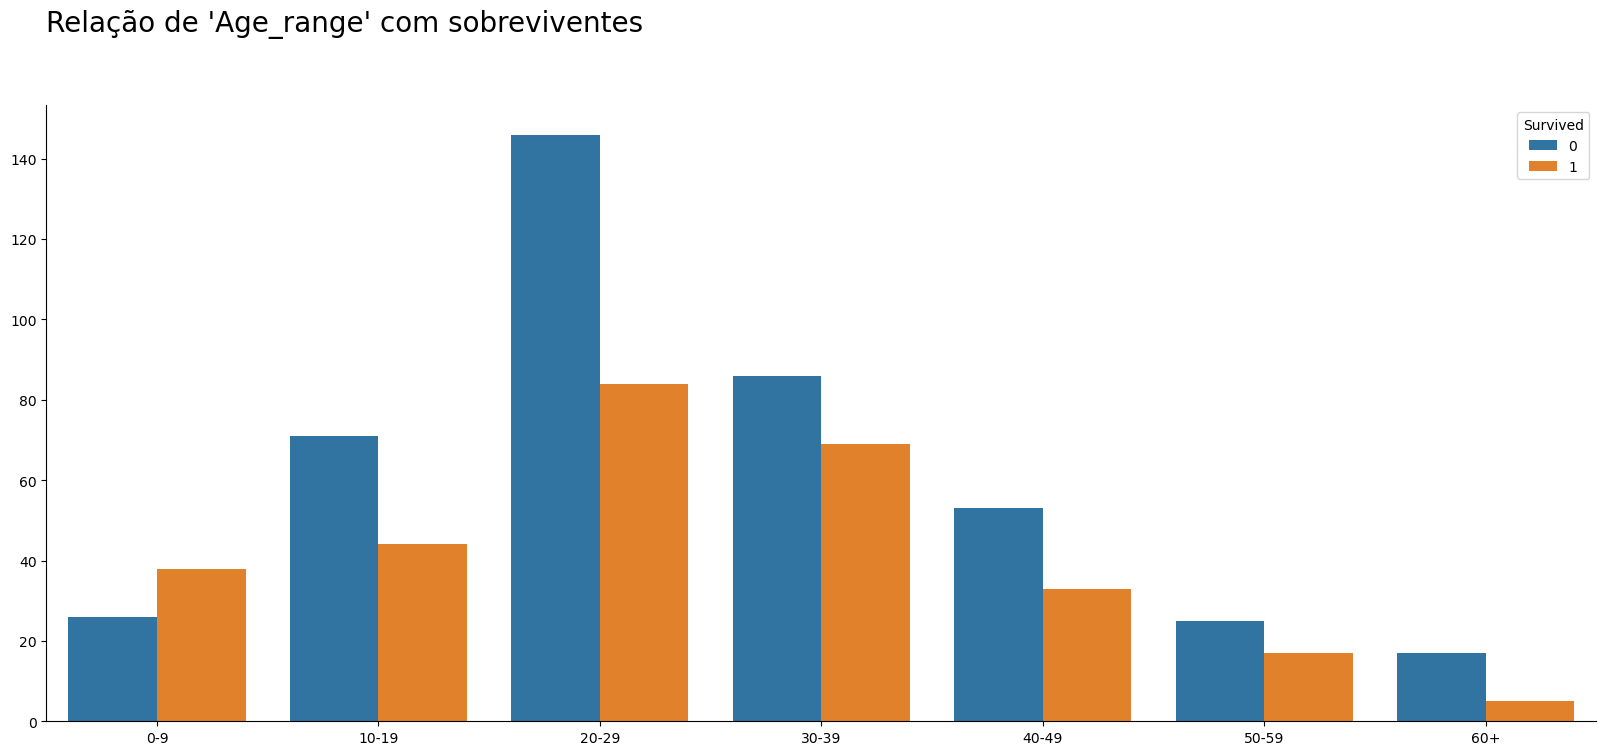

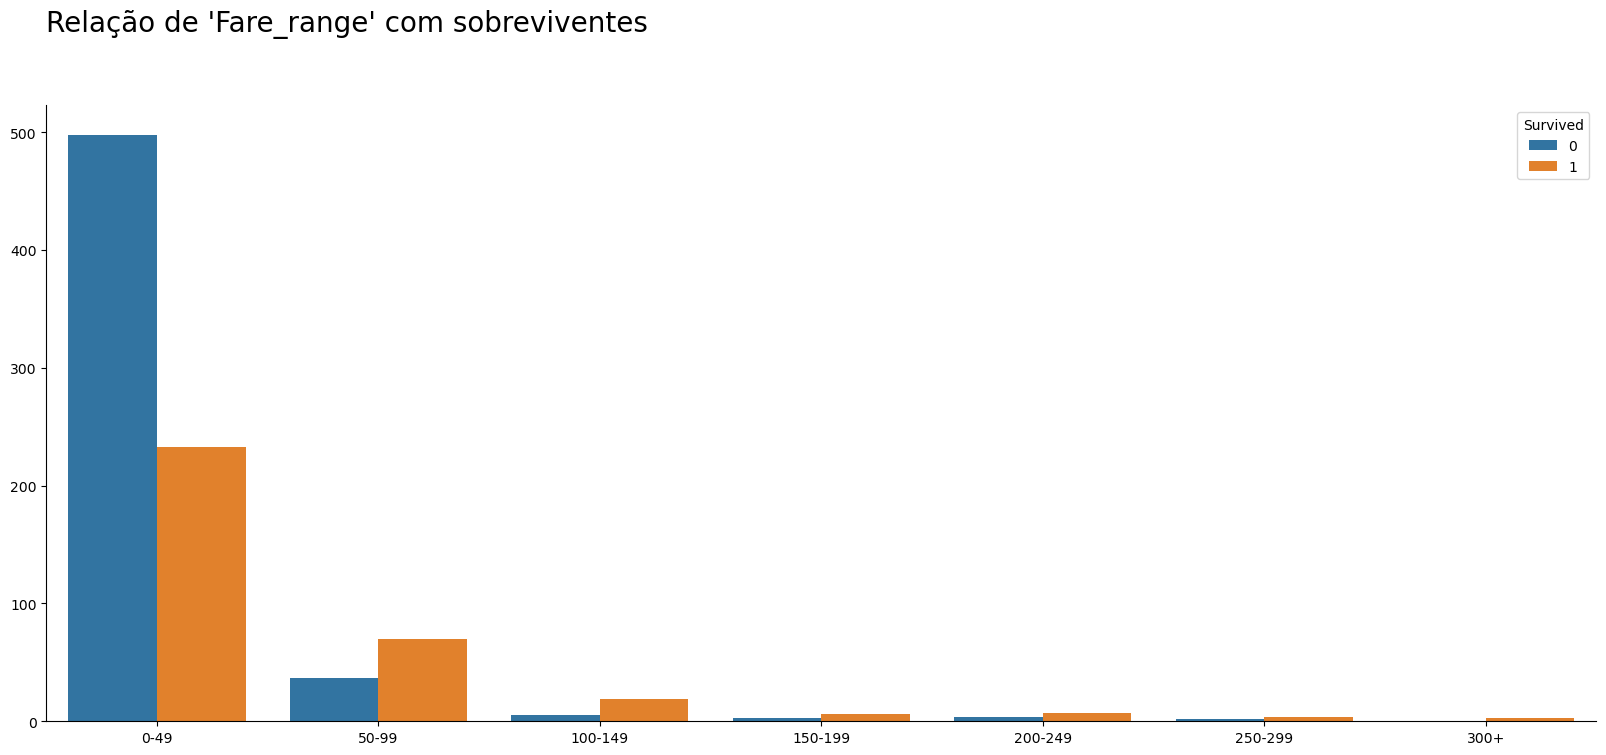

In [9]:
for column in df.columns:
    fig, ax = plt.subplots(figsize=(20,8))
    
    sns.countplot(df, x=column, ax=ax, hue='Survived')
    
    ax.set_title(f"Relação de '{column}' com sobreviventes\n\n", loc='left', fontsize=20)
    ax.set(xlabel='', ylabel='')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


Com esses gráficos, já podemos construir um direcionamento:  

A maioria dos passageiros não sobreviveram  
Então, para os outros parâmetros, a barra azul deveria ser sempre maior  

Não é o que acontece para Pclass 1 e 2, por que?  

E nem para o sexo feminino  

Para idade, muitas crianças sobreviveram  

Para SibSp 1, temos um equilíbrio, será que os maridos salvaram suas mulheres?  

Parch também, somente número 1 faz sentido  

A maioria dos passageiros embarcados em C sobreviveram

# 2. Avaliando 'Pclass'

Essa coluna mostra se é primeira, segunda ou terceira classe  
Além de luxo, o que pode influenciar a diferença de classes?  
Proximidade com rotas de segurança/barcos salva vidas?  

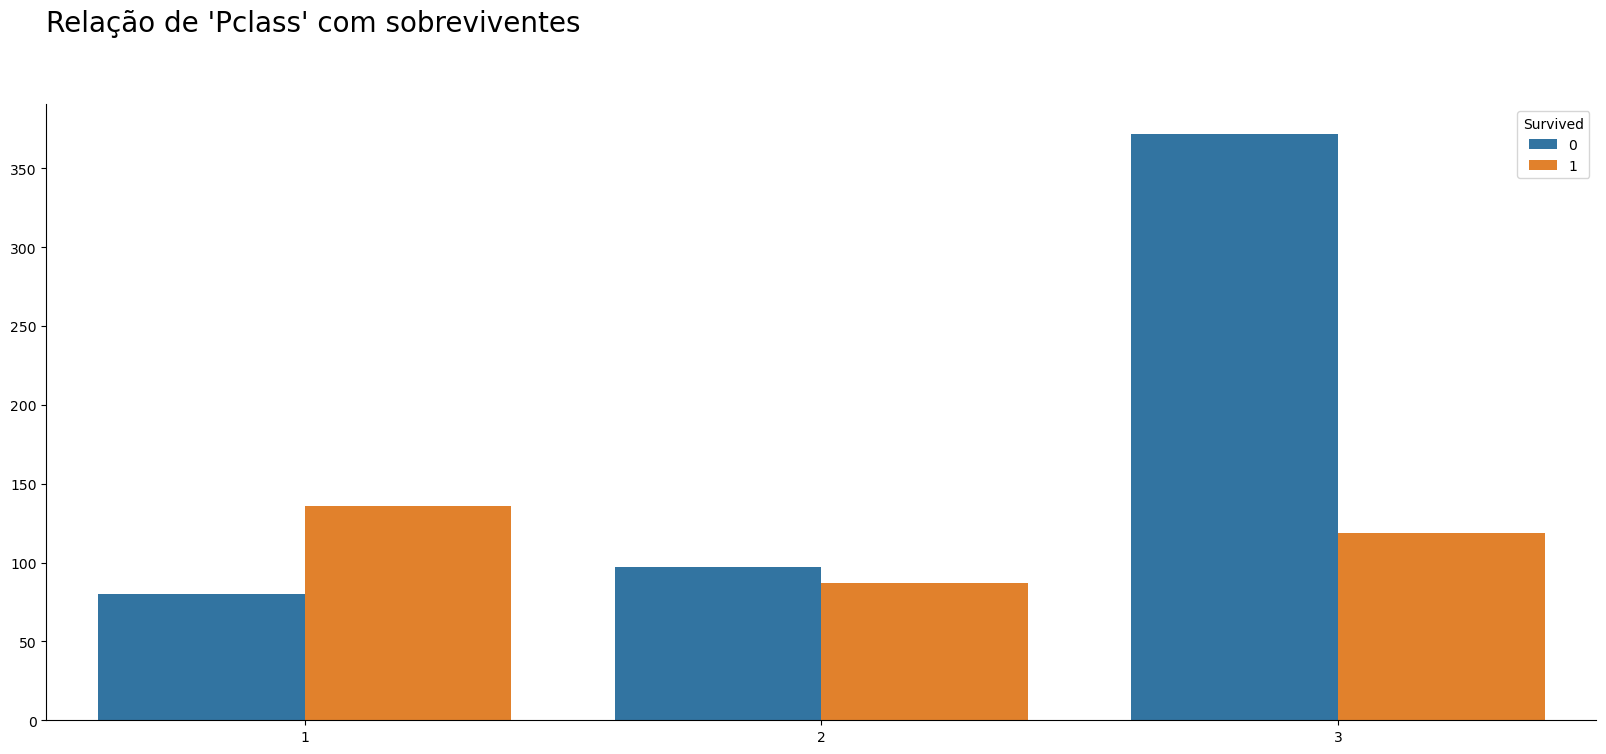

In [10]:
column = 'Pclass'

fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df, ax=ax, x=column, hue='Survived')

ax.set_title(f"Relação de '{column}' com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

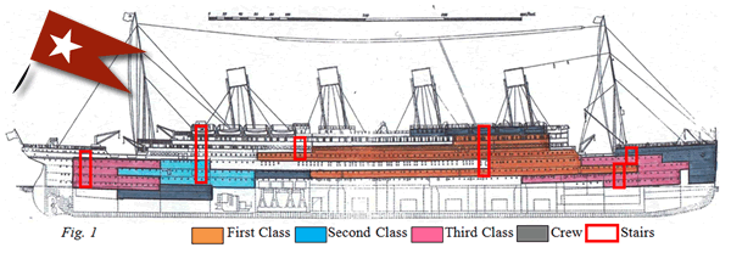  
https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/

Os botes salva vidas são localizados na parte superior do navio  
De fato, o acesso é bem mais fácil e rápido para a primeira e segunda classe, aumentando a taxa de sobreviência  

# 3. Avaliando Sex

Na época o cavalheirismo era muito presente na sociedade  
Existia uma frase dizendo que "mulheres e crianças devem ser salvos primeiro"  
Vamos validar essa hipótese, já vimos que a maioria dos homens não sobreviveu  

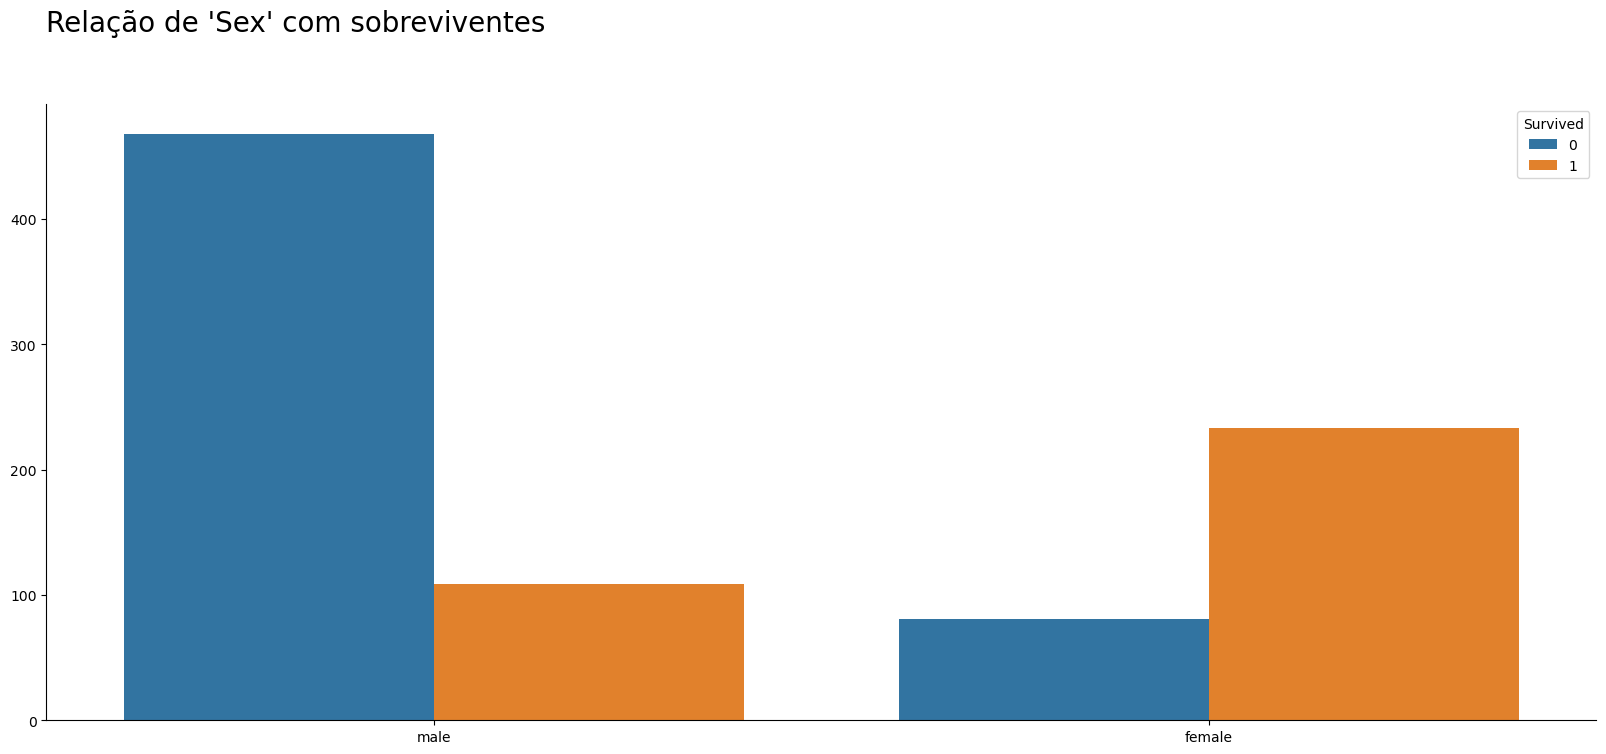

In [11]:
column = 'Sex'

fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df, ax=ax, x=column, hue='Survived')

ax.set_title(f"Relação de '{column}' com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

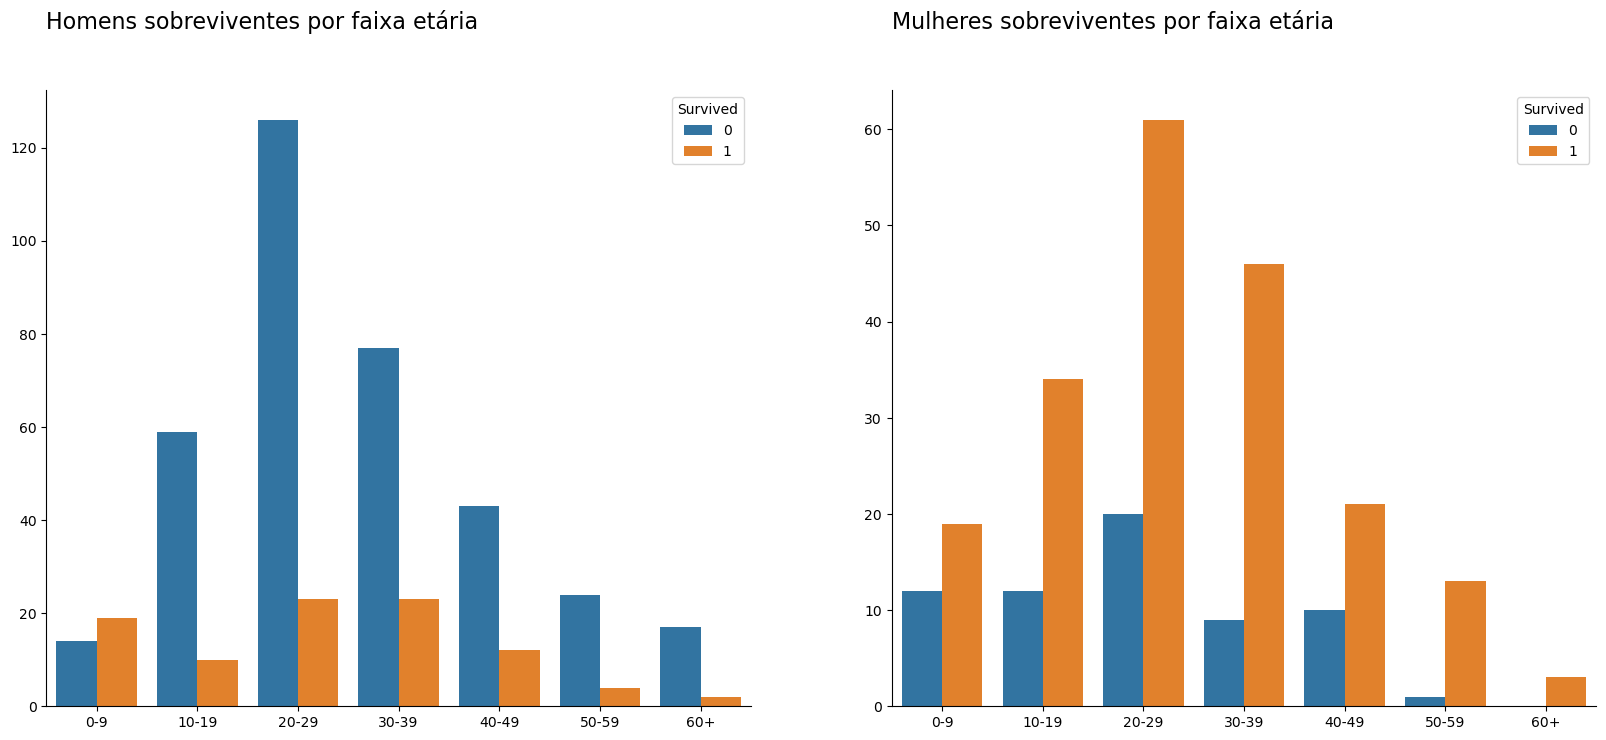

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.countplot(df[df['Sex'] == 'male'], ax=ax[0], x='Age_range', hue='Survived')
sns.countplot(df[df['Sex'] == 'female'], ax=ax[1], x='Age_range', hue='Survived')

ax[0].set_title('Homens sobreviventes por faixa etária\n\n', loc='left', fontsize=16)
ax[0].set(xlabel='', ylabel='')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].set_title('Mulheres sobreviventes por faixa etária\n\n', loc='left', fontsize=16)
ax[1].set(xlabel='', ylabel='')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

Realmente as mulheres foram salvas prioritariamente  
Não podemos dizer o mesmo para crianças, principalmente do sexo masculino  

Será que o poder aquisitivo teve influência também?  

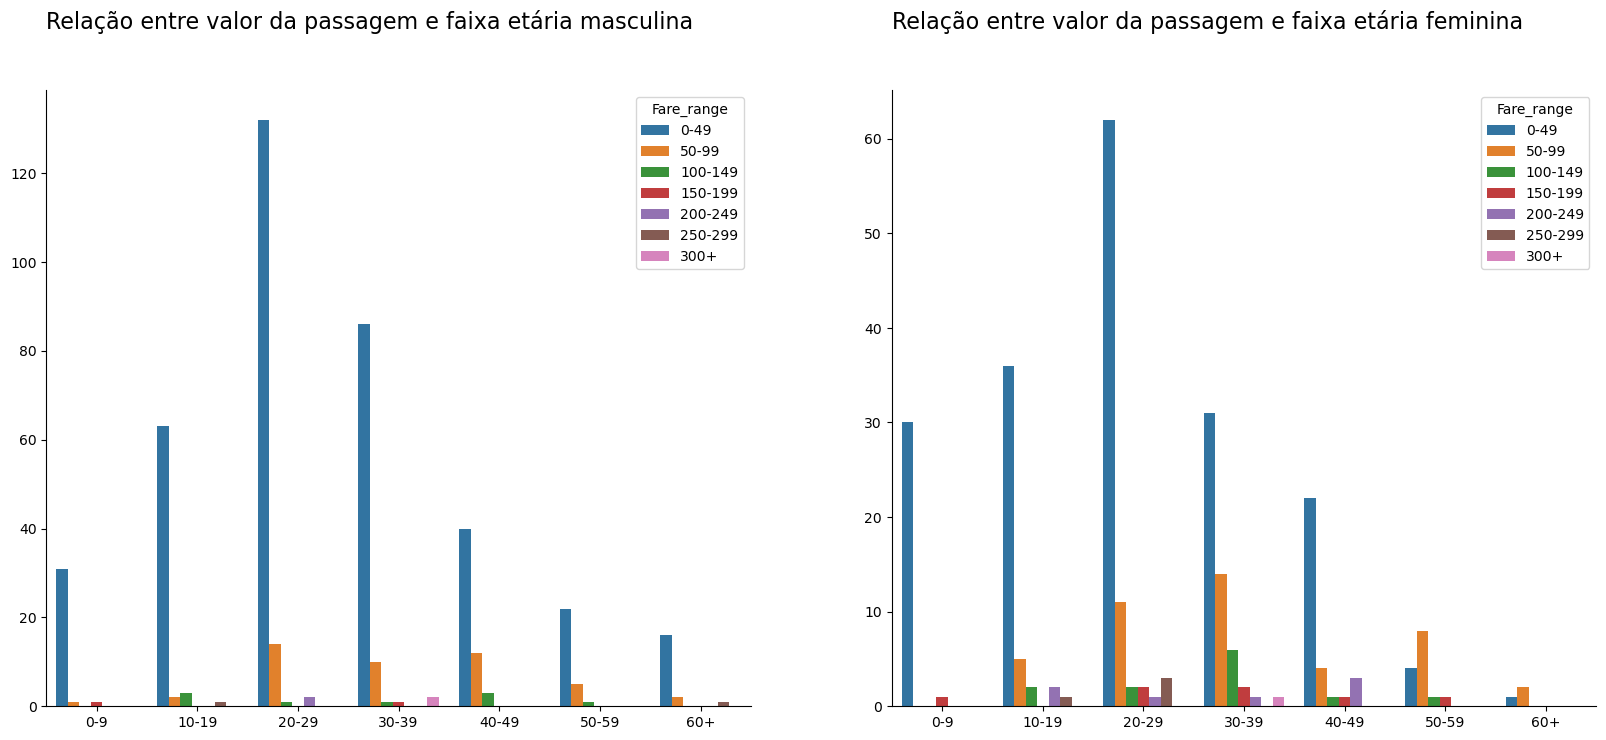

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.countplot(df[df['Sex'] == 'male'], ax=ax[0], x='Age_range', hue='Fare_range')
sns.countplot(df[df['Sex'] == 'female'], ax=ax[1], x='Age_range', hue='Fare_range')

ax[0].set_title('Relação entre valor da passagem e faixa etária masculina\n\n', loc='left', fontsize=16)
ax[0].set(xlabel='', ylabel='')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].set_title('Relação entre valor da passagem e faixa etária feminina\n\n', loc='left', fontsize=16)
ax[1].set(xlabel='', ylabel='')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

Descobrimos uma coisa interessante!  
As mulheres pagam passagens mais caras que os homens  
Vamos explorar isso posteriormente

Aqui podemos tirar a prova sobre a influência financeira  
Nos gráficos de cima vemos que a maioria dos homens que não sobreviveu está entre 10-49 anos  
Já no gráfico de baixo, temos uma baixa dispersão no preço das passagens  

Hipótese:  
Se as pessoas nessa faixa de idade e com taxas mais caras sobreviveram,  
o custo da passagem influenciou na probabilidade de vida  

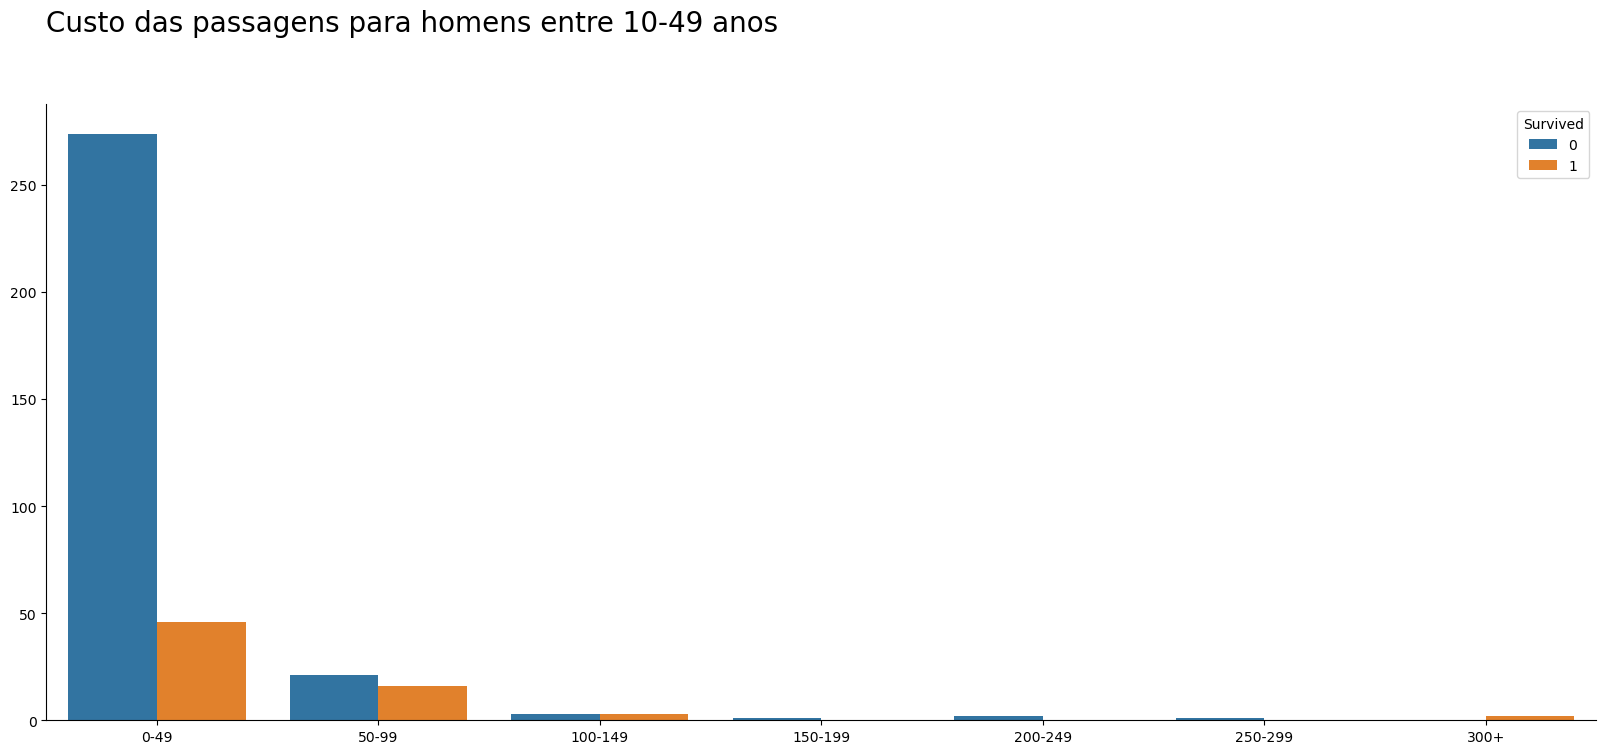

In [14]:
fig, ax = plt.subplots(figsize=(20,8))

filtered_df = df[(df['Age'] >= 10) & (df['Age'] < 50) & (df['Sex'] == 'male')]
sns.countplot(filtered_df, ax=ax, x='Fare_range', hue='Survived')

ax.set_title("Custo das passagens para homens entre 10-49 anos\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Amostragem muito pequena, difícil fazer uma conclusão  
Vamos checar para as mulheres  

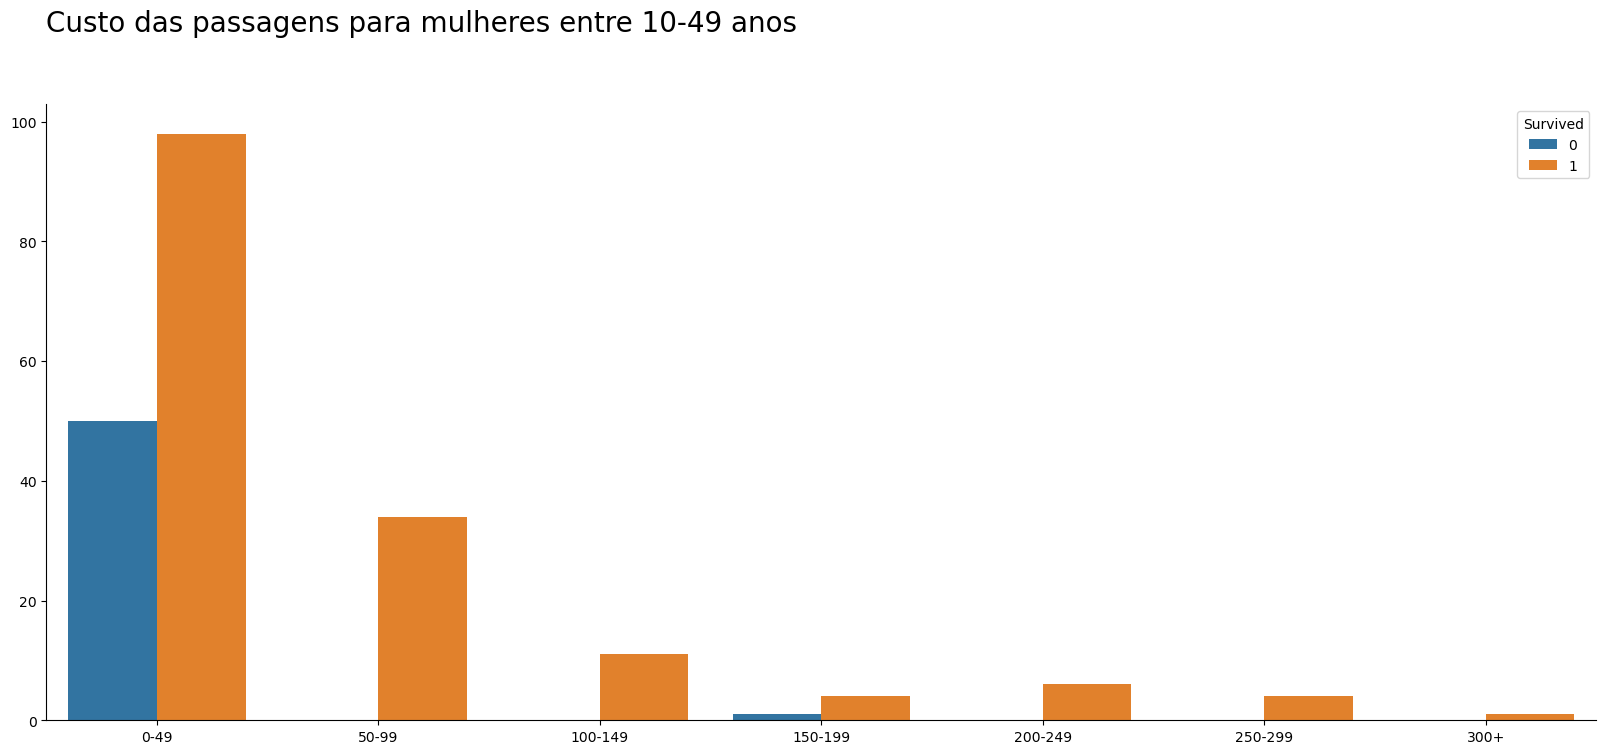

In [15]:
fig, ax = plt.subplots(figsize=(20,8))

filtered_df = df[(df['Age'] >= 10) & (df['Age'] < 50) & (df['Sex'] == 'female')]
sns.countplot(filtered_df, ax=ax, x='Fare_range', hue='Survived')

ax.set_title("Custo das passagens para mulheres entre 10-49 anos\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Agora sim!  
Olhando a maior faixa etária de sobrevivência de mulheres, vemos uma relação direta com o preço da passagem  

# 4. Avaliando SibSp

Essa coluna mostra a quantidade de irmãos/cônjuges para cada passageiro  

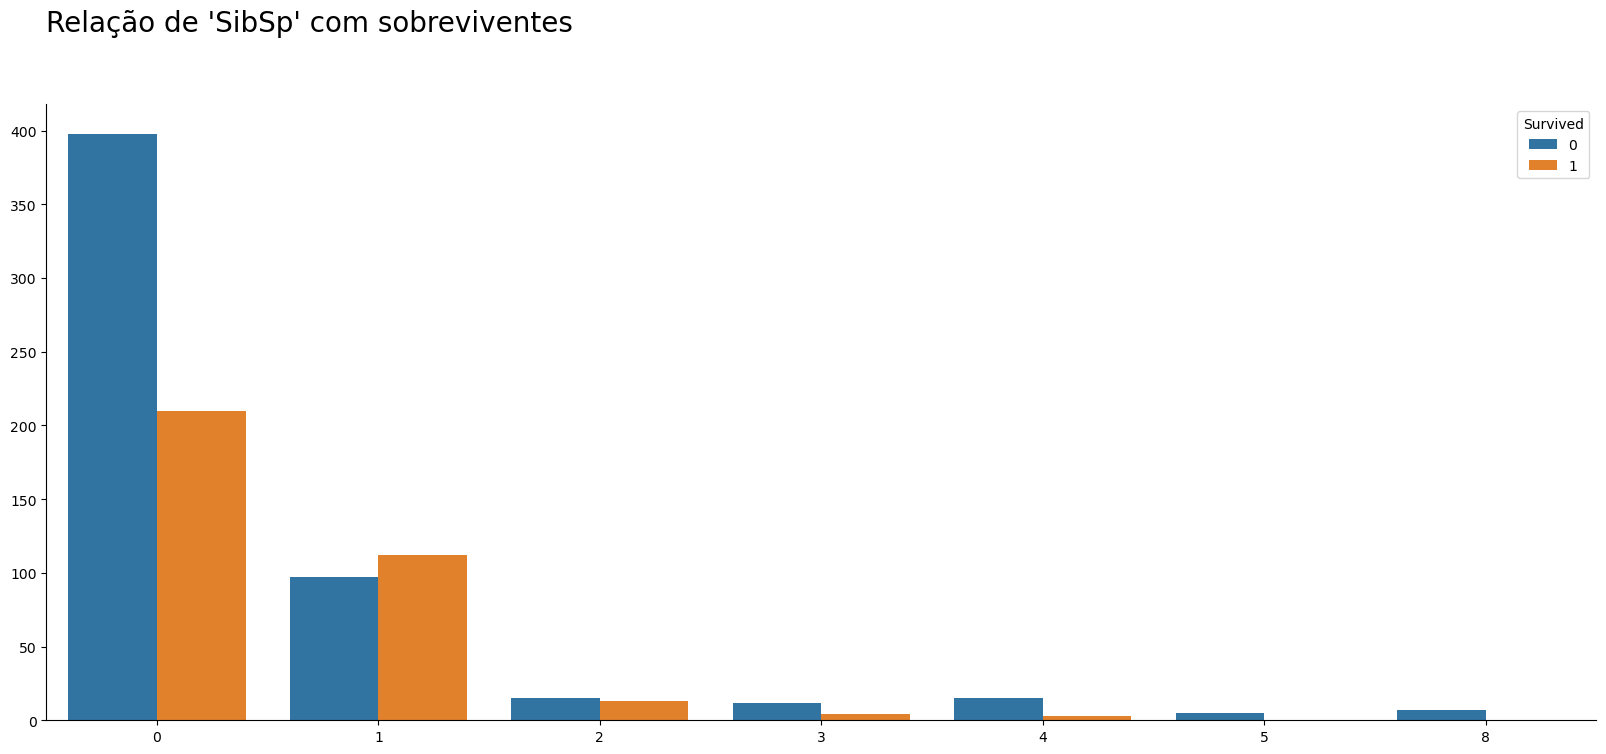

In [16]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df, ax=ax, x='SibSp', hue='Survived')

ax.set_title("Relação de 'SibSp' com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Interessante notar que famílias grandes (>= 2 pessoas) tiveram poucos sobreviventes  

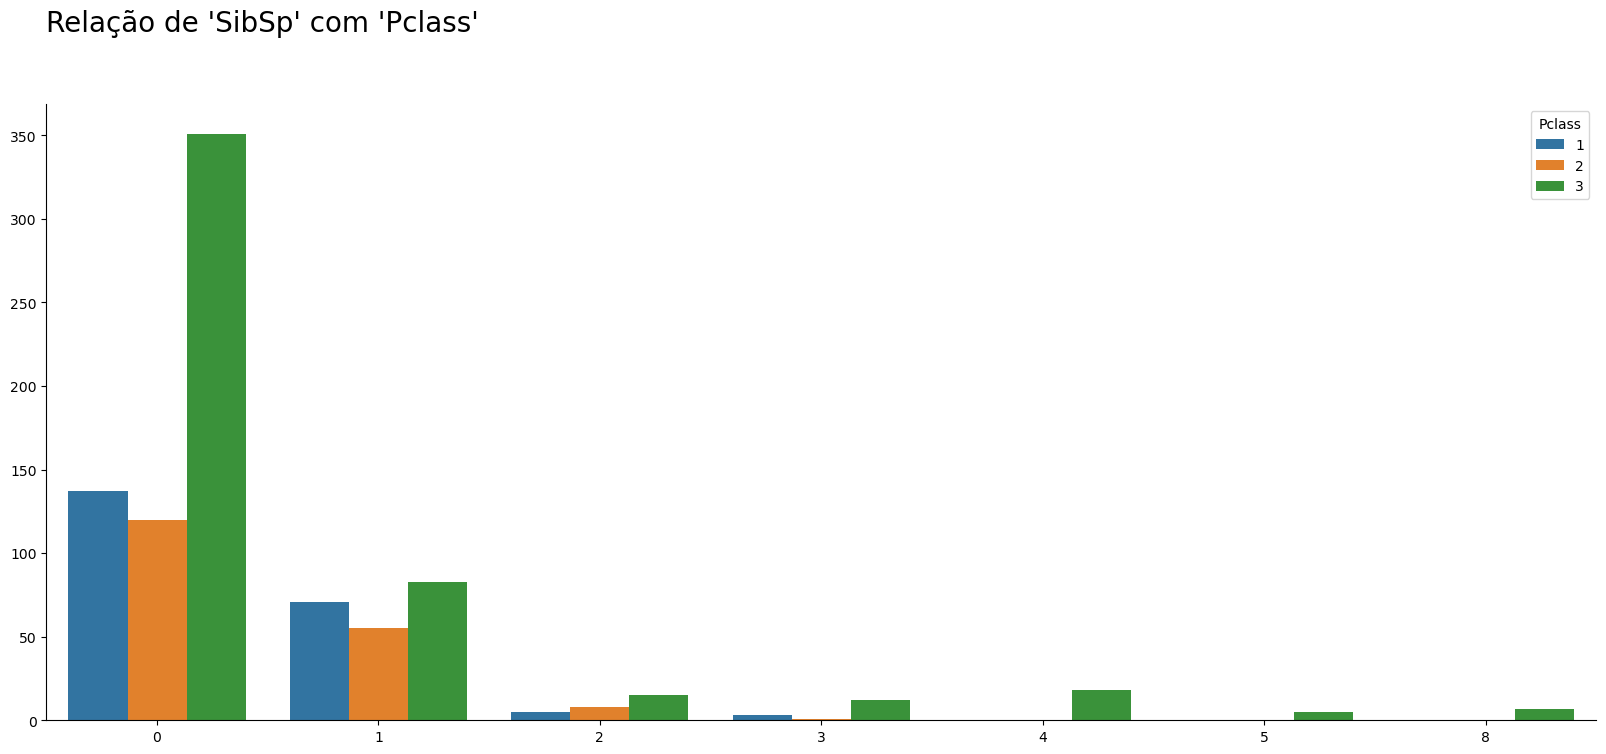

In [17]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df, ax=ax, x='SibSp', hue='Pclass')

ax.set_title("Relação de 'SibSp' com 'Pclass'\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

COINCIDENTEMENTE (contém ironia) são os grupos de terceira classe  
Vamos explorar melhor as famílias pequenas  

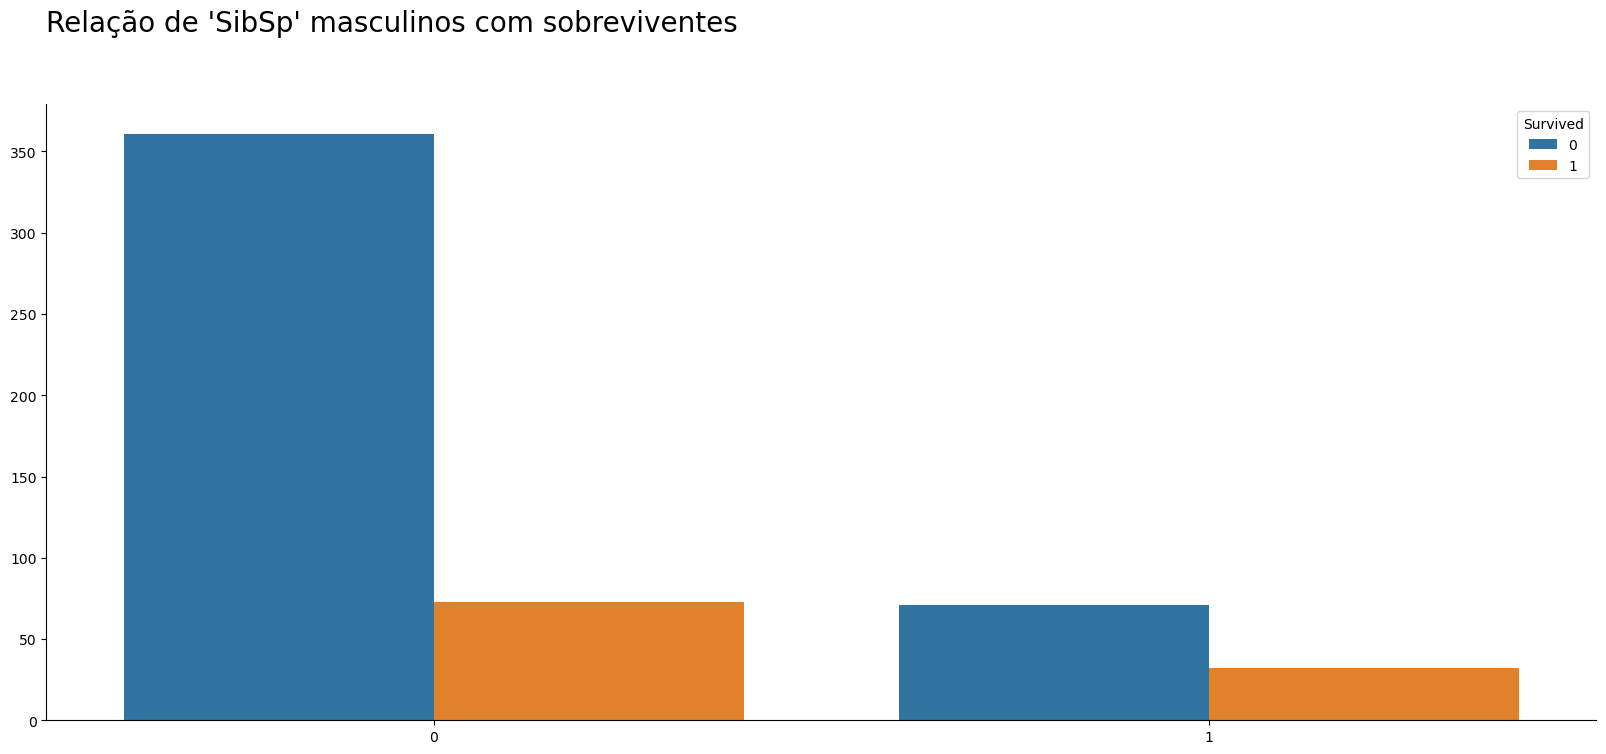

In [18]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df[(df['SibSp'] < 2) & (df['Sex'] == 'male')], ax=ax, x='SibSp', hue='Survived')

ax.set_title("Relação de 'SibSp' masculinos com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

A maioria dos homens solteiros não sobreviveu  

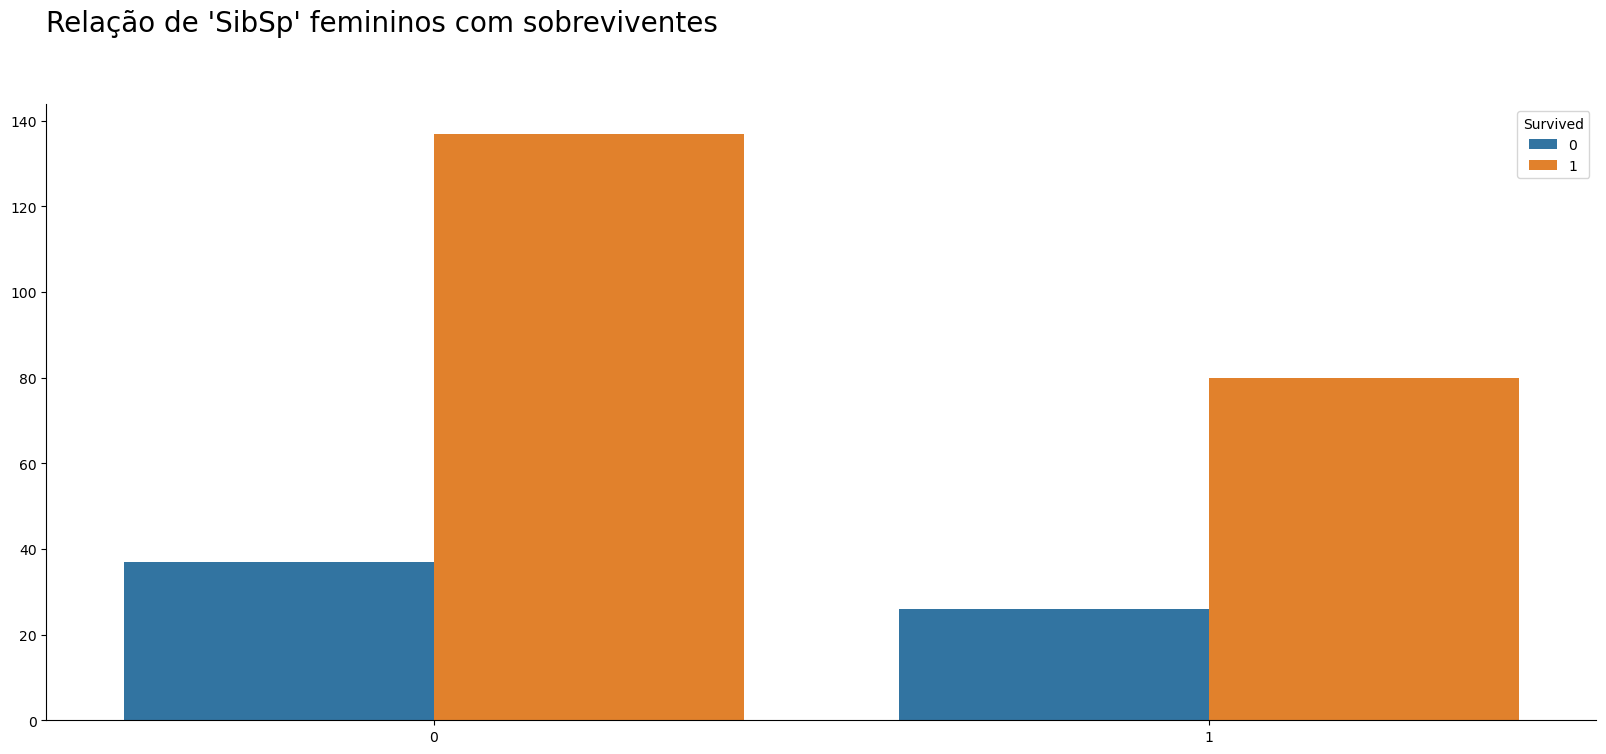

In [19]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df[(df['SibSp'] < 2) & (df['Sex'] == 'female')], ax=ax, x='SibSp', hue='Survived')

ax.set_title("Relação de 'SibSp' femininos com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

E o contrário ocorre para as mulheres  

# 5. Avaliando Parch

Parch mostra a quantidade de pais/filhos para cada passageiro  

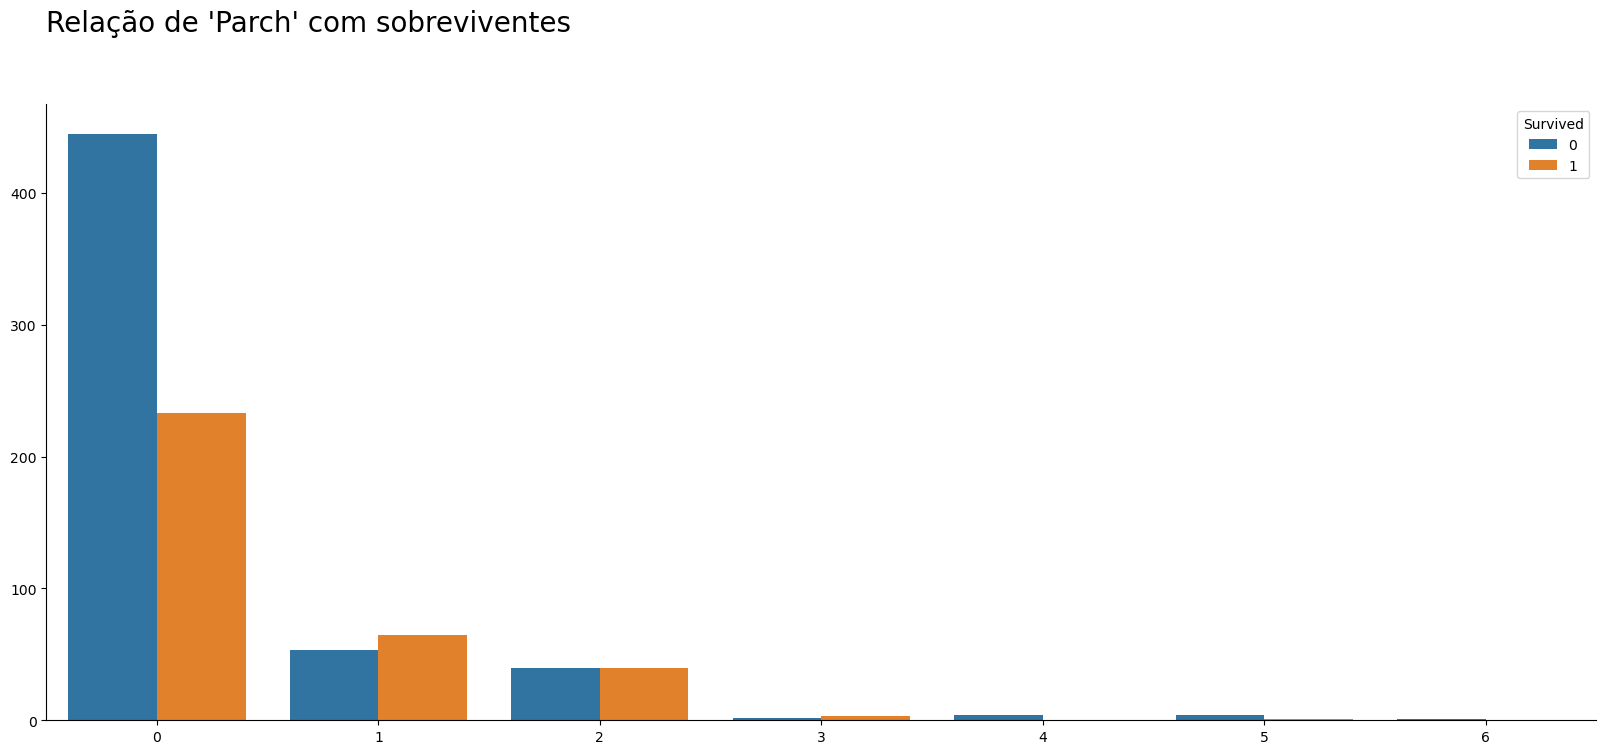

In [20]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df, ax=ax, x='Parch', hue='Survived')

ax.set_title("Relação de 'Parch' com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

São poucas as pessoas com >= 3 parentes, não construindo uma amostragem suficiente para análise  

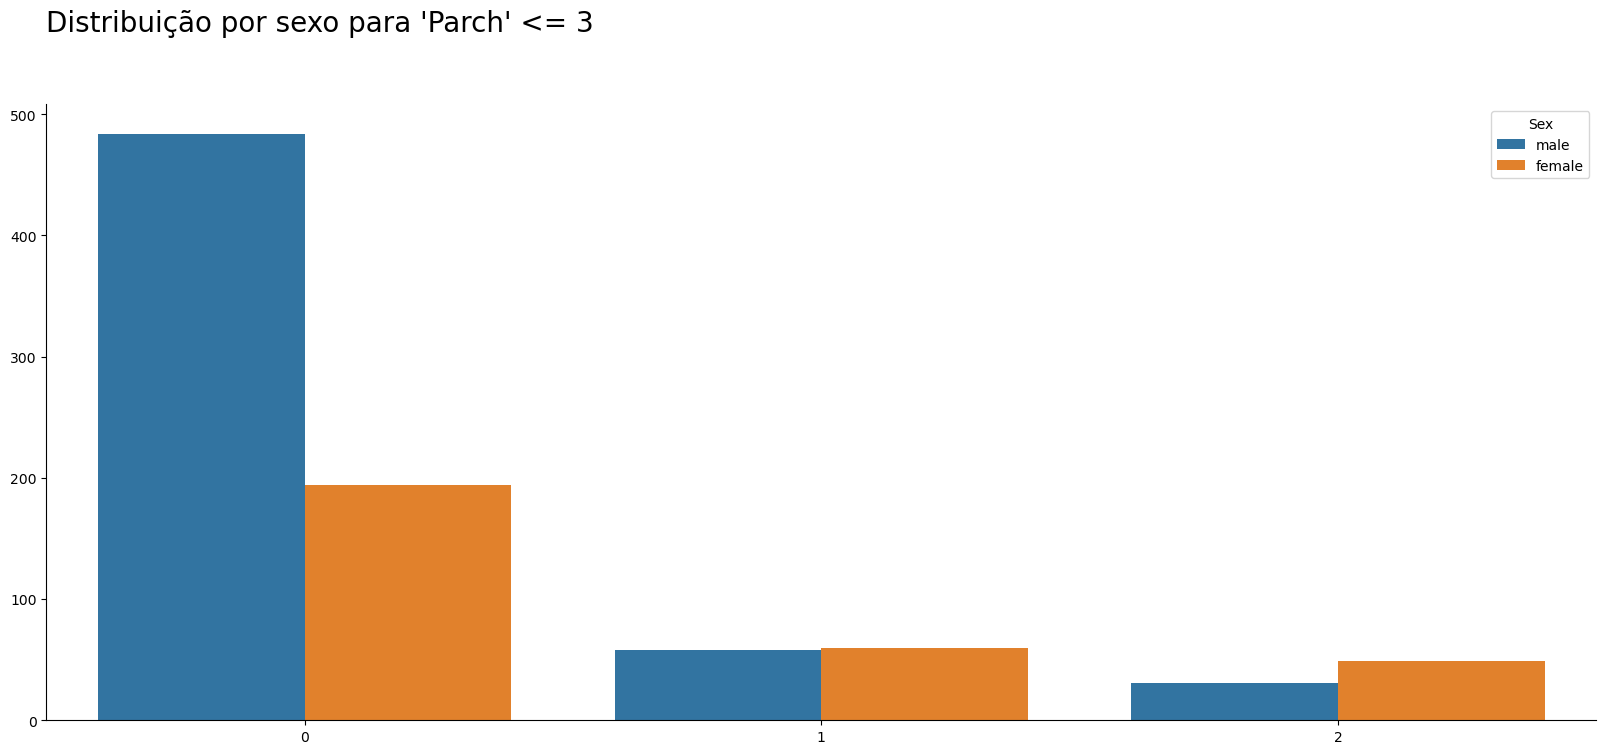

In [21]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df[df['Parch'] < 3], ax=ax, x='Parch', hue='Sex')

ax.set_title("Distribuição por sexo para 'Parch' <= 3\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

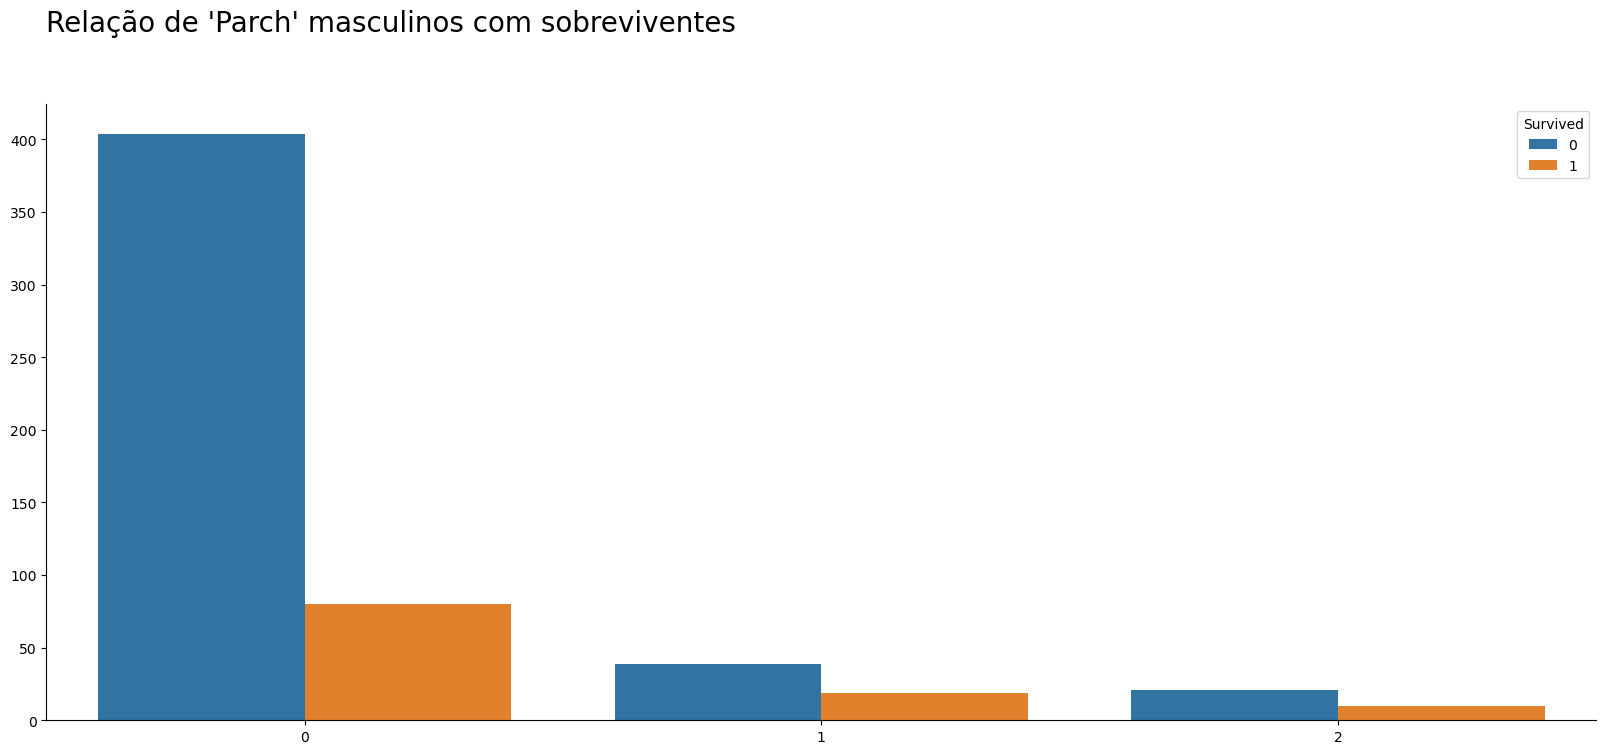

In [22]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df[(df['Parch'] < 3) & (df['Sex'] == 'male')], ax=ax, x='Parch', hue='Survived')

ax.set_title("Relação de 'Parch' masculinos com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

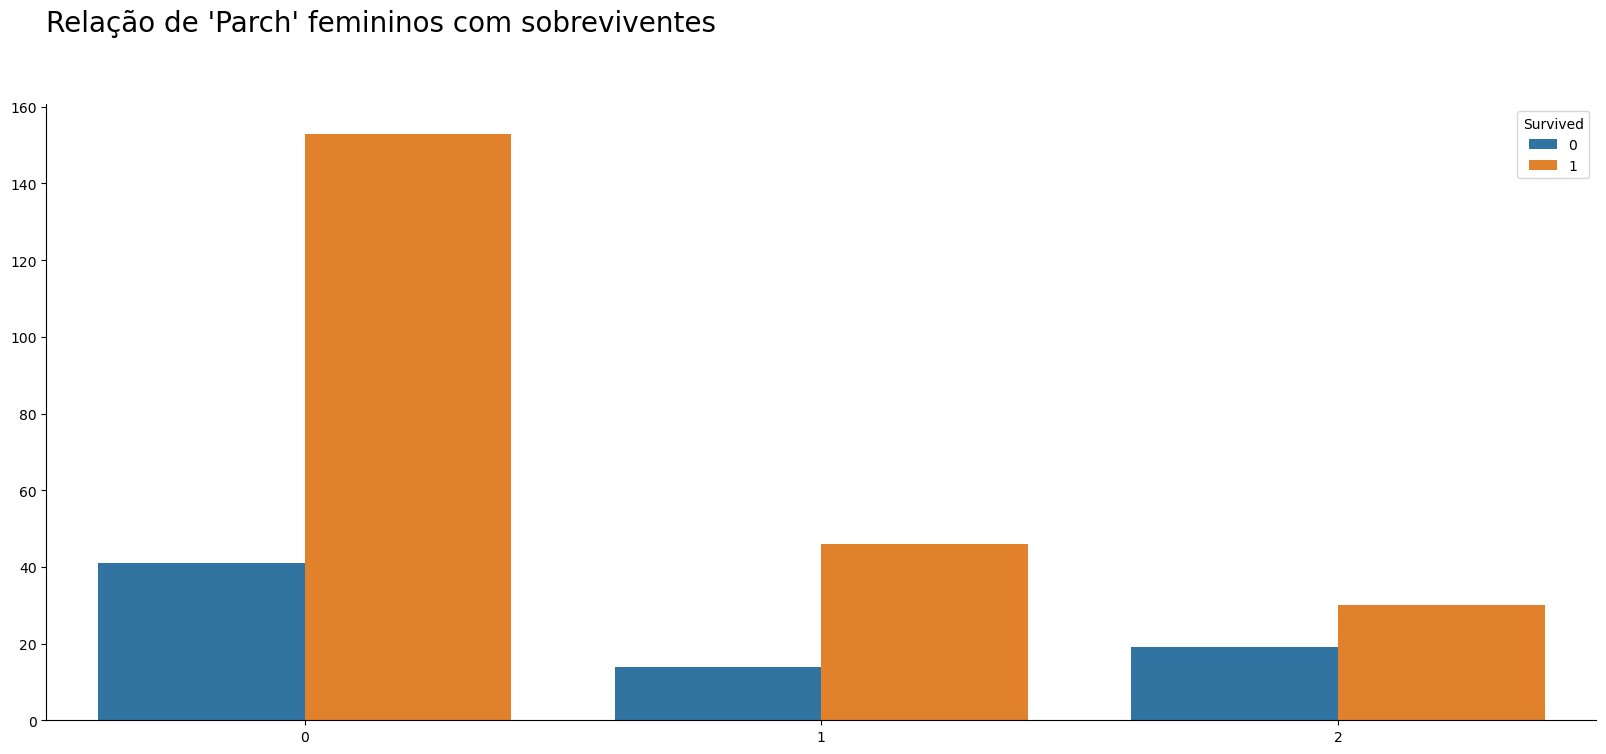

In [23]:
fig, ax = plt.subplots(figsize=(20,8))

sns.countplot(df[(df['Parch'] < 3) & (df['Sex'] == 'female')], ax=ax, x='Parch', hue='Survived')

ax.set_title("Relação de 'Parch' femininos com sobreviventes\n\n", loc='left', fontsize=20)
ax.set(xlabel='', ylabel='')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Aqui o padrão se repete  
Assim como SibSp, quando olhamos o Parch, a maioria dos homens não sobreviveu  enquanto o oposto ocorre para as mulheres  

# 6. Conclusão

- Primeiramente, vamos fazer um resumo de cada tópico abordado anteriormente:  

Primeira e Segunda Classe tendem a ter mais sobreviventes devido à proximidade com saídas de emergência  
Mulheres tendem a sobreviver frente aos homens  
Mulheres solteiras tem maior chance de sobreviver se comparado com acompanhadas  
No geral, quanto maior a família, menor a chance de sobrevivência  
Mulheres entre 20-29 anos possuem maior chance de sobreviver  
Mulheres gastam mais com as passagens  

- Funcionamento da seguradora:  

De forma resumida, o cliente escolhe um tipo de proteção financeira, nesse caso o seguro de vida  
A seguradora então coleta os dados do cliente e avalia o perfil de risco (idade, sexo, saúde, profissão, valor da indenização)  
Após firmado o contrato, o cliente deve pagar o prêmio (valor periódico, normalmente mensal)  
E, em caso de acionamento do sinistro (acontecimento do evento segurado), a seguradora paga a indenização para o beneficente  

- Como a seguradora lucra?  

A partir da repartição de riscos  
A empresa dilui o custo da indenização entre os clientes com o mesmo perfil de risco  
E em cima disso aplica as margens de lucro  

- Quais os principais fatores que afetam o prêmio/indenização?

Idade, Sexo, Saúde, Profissão, Valor da indenização, Coberturas adicionais, Risco

- Dado esse contexto, podemos entender como aumentar o lucro da empresa:

Ajuste de preços de acordo com o perfil do cliente  
Quanto maior o risco, maior o prêmio, logo  
1- Aumento da tarifa para homens, famílias grandes (>= 2 pessoas) e mulheres entre 20-29 anos  

Descontos para grupos específicos  
Quanto menor o risco, maior a chance da cliente continuar pagando  
2- Desconto para mulheres e para solteiros, especialmente mulheres solteiras  

Campanhas de marketing  
Menos risco = mais lucro, e já vimos que as mulheres normalmente gastam mais que os homens  
3- Campanhas com foco em segurança da mulher  
4- Parceria com a empresa naval, oferecendo pacotes junto com upgrade de classe  

Revisão das margens de lucro  
Como as pessoas mais ricas tendem a sobreviver mais, elas podem pagar um prêmio maior  
Aqui vale uma pesquisa de mercado com as concorrentes!